In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('Clean_fact.csv')

# Display first 5 rows and column info
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Info:")
df.info()

First 5 rows of the dataset:


,date,name,age,gender,armed,race,City,Code,flee,body_camera,signs_of_mental_illness,police_departments_involved,year
0,2015-01-02,Lewis Lee Lembke,47,male,gun,White,Aloha CDP,OR,not,False,False,"Washington County Sheriff's Office, OR",2015
1,2015-01-02,Tim Elliot,53,male,gun,Asian,Shelton city,WA,not,False,True,"Mason County Sheriff's Office, WA",2015
2,2015-01-03,John Paul Quintero,23,male,unarmed,Hispanic,Wichita city,KS,not,False,False,"Wichita Police Department, KS",2015
3,2015-01-04,Kenneth Joe Brown,18,male,gun,White,Guthrie city,OK,not,False,False,"Oklahoma Highway Patrol, OK",2015
4,2015-01-04,Michael Rodriguez,39,male,other,Hispanic,Evans city,CO,not,False,False,"Evans Police Department, CO",2015



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         9893 non-null   object
 1   name                         9893 non-null   object
 2   age                          9893 non-null   int64 
 3   gender                       9893 non-null   object
 4   armed                        9893 non-null   object
 5   race                         9893 non-null   object
 6   City                         9893 non-null   object
 7   Code                         9893 non-null   object
 8   flee                         9893 non-null   object
 9   body_camera                  9893 non-null   bool  
 10  signs_of_mental_illness      9893 non-null   bool  
 11  police_departments_involved  9893 non-null   object
 12  year                         9893 non-null   int64 
dtypes: bool(2), int64(

In [3]:
# Define Features (Inputs) and Target (Output)
features = ['age', 'gender', 'armed', 'race', 'flee']
target = 'signs_of_mental_illness'

# Create a copy of the specific columns
model_data = df[features + [target]].copy()

print(f"Number of rows ready for training: {len(model_data)}")

Number of rows ready for training: 9893


In [4]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of columns containing text
text_cols = ['gender', 'armed', 'race', 'flee']

for col in text_cols:
    # Convert text to numbers
    model_data[col] = le.fit_transform(model_data[col].astype(str))
    print(f"Column '{col}' successfully encoded.")

# Convert Target column (True/False) to (1/0)
model_data[target] = model_data[target].astype(int)

# Check data after encoding
model_data.head()

Column 'gender' successfully encoded.
Column 'armed' successfully encoded.
Column 'race' successfully encoded.
Column 'flee' successfully encoded.


,age,gender,armed,race,flee,signs_of_mental_illness
0,47,1,2,8,3,0
1,53,1,2,0,3,1
2,23,1,16,3,3,0
3,18,1,2,8,3,0
4,39,1,9,3,3,0


In [5]:
# X = Questions (Features)
X = model_data[features]
# y = Answers (Target)
y = model_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (7914, 5)
Testing Data Shape: (1979, 5)


In [6]:
# Initialize the model (with 100 decision trees)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training completed successfully!")

Model training completed successfully!


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

Model Accuracy: 77.36%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1585
           1       0.35      0.16      0.22       394

    accuracy                           0.77      1979
   macro avg       0.58      0.54      0.54      1979
weighted avg       0.72      0.77      0.74      1979



C:\Users\dell\AppData\Local\Temp\ipykernel_16440\2487353597.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


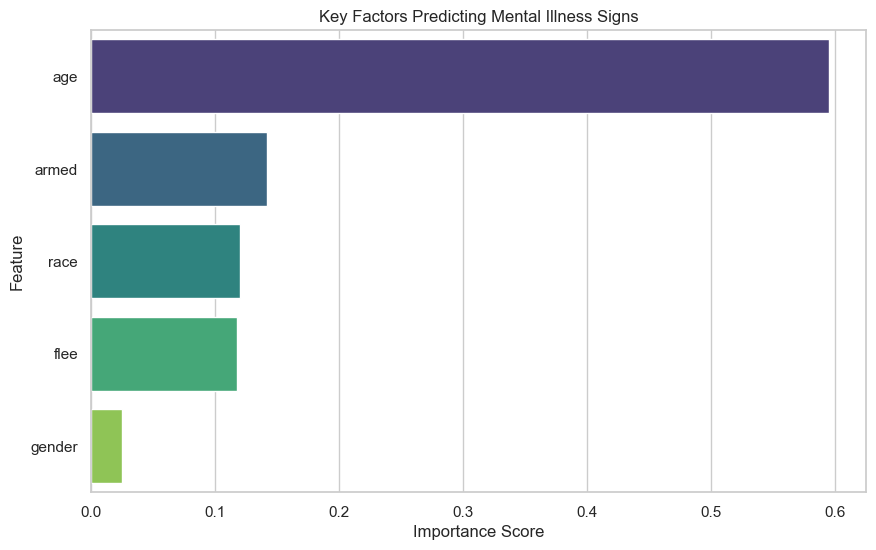

In [8]:
# Extract feature importance
importances = model.feature_importances_
feature_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")

plt.title("Key Factors Predicting Mental Illness Signs")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [10]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Collecting imbalanced-learn




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\dell\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [11]:
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter

print("Libraries imported successfully.")

Libraries imported successfully.


In [12]:
# Display class distribution BEFORE SMOTE
print(f"Original training set shape: {Counter(y_train)}")

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display class distribution AFTER SMOTE
print(f"Resampled training set shape: {Counter(y_train_smote)}")

Original training set shape: Counter({0: 6356, 1: 1558})
Resampled training set shape: Counter({0: 6356, 1: 6356})


In [13]:
# Initialize the Random Forest Classifier
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("Training the model on balanced data...")
model_smote.fit(X_train_smote, y_train_smote)
print("Training completed.")

Training the model on balanced data...
Training completed.


In [14]:
# Predict on the test set
y_pred_smote = model_smote.predict(X_test)

# Print the evaluation report
print("=== Classification Report (SMOTE Model) ===")
print(classification_report(y_test, y_pred_smote))

=== Classification Report (SMOTE Model) ===
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1585
           1       0.28      0.52      0.36       394

    accuracy                           0.64      1979
   macro avg       0.56      0.59      0.55      1979
weighted avg       0.73      0.64      0.67      1979

